Topic: Challenge Set 3 Subject: Explore MTA turnstile data Date: 09/27/2019 Name: Alison Glazer Worked with: -- Location: https://github.com/alisonglazer/metis_challenges/blob/master/challenge_set_3_alison.ipynb

In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [203]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime

In [131]:
df = pd.read_csv('challenges_data/2013_movies.csv')

In [4]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


## **CHALLENGE 1**

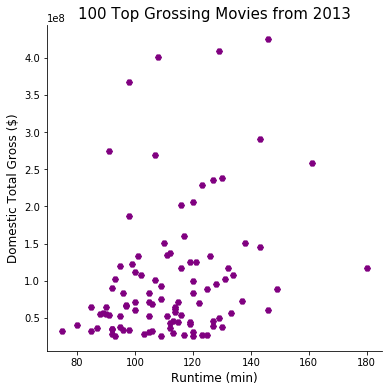

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(df.Runtime,df.DomesticTotalGross,color='purple',marker='H')
plt.xlabel('Runtime (min)',size=12)
plt.ylabel('Domestic Total Gross ($)',size=12);
plt.title('100 Top Grossing Movies from 2013', size=15)
sns.despine()

## **CHALLENGE 2**

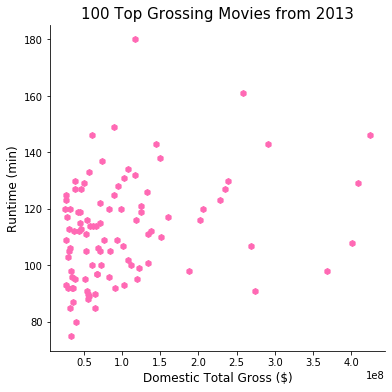

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(df.DomesticTotalGross,df.Runtime,color='hotpink',marker='h')
plt.ylabel('Runtime (min)',size=12)
plt.xlabel('Domestic Total Gross ($)',size=12);
plt.title('100 Top Grossing Movies from 2013', size=15)
sns.despine()

## **CHALLENGE3**

In [37]:
df.groupby('Rating')[['Runtime','DomesticTotalGross']].mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


## **CHALLENGE 4**

In [132]:
df['ReleaseDate'] = pd.to_datetime(df.ReleaseDate)

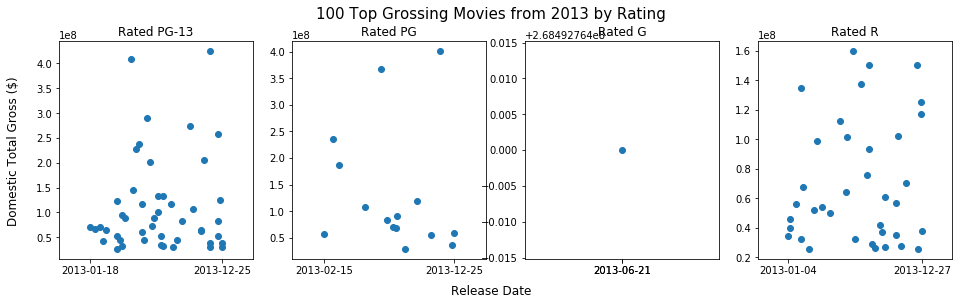

In [154]:
n = df.Rating.nunique()

fig,axs = plt.subplots(nrows = 1,ncols = n, sharex=True, sharey=True, figsize=(4*n,4))
fig.suptitle('100 Top Grossing Movies from 2013 by Rating',x=0.5,y=1,size=15);
fig.text(0.5, 0, 'Release Date', ha='center', size=12)
fig.text(0.08, 0.5, 'Domestic Total Gross ($)', va='center', rotation='vertical',size = 12)


for ix,rating in enumerate(df.Rating.unique()):
    x = df.ReleaseDate.loc[df.Rating == rating]
    plt.subplot(1,n,ix+1)
    plt.scatter(x,df.DomesticTotalGross.loc[df.Rating == rating])
    plt.title('Rated {}'.format(rating),size=12)
    plt.xticks(ticks=[min(x),max(x)])

## **CHALLENGE 5**

In [171]:
#Interpreted question as highest average gross per movie
chal5 = df.groupby('Director').DomesticTotalGross.mean().sort_values(ascending=False)
chal5[chal5==chal5[0]]

Director
Francis Lawrence    424668047
Name: DomesticTotalGross, dtype: int64

## **CHALLENGE 6**

In [219]:
df['month'] = df.ReleaseDate.dt.month
month_df = df.groupby('month').DomesticTotalGross.agg([np.std,np.mean,np.size,np.sum,stats.sem])
month_df

,std,mean,size,sum,sem
month,,,,,
1,1.465947e+07,4.954324e+07,5,247716186,6.555914e+06
2,3.283185e+07,6.738601e+07,7,471702096,1.240927e+07
3,7.323942e+07,9.609710e+07,9,864873866,2.441314e+07
4,2.530104e+07,6.094072e+07,6,365644317,1.032911e+07
5,1.117754e+08,1.774097e+08,8,1419277764,3.951859e+07
6,9.519994e+07,1.506500e+08,8,1205200046,3.365826e+07
7,9.140837e+07,1.057807e+08,12,1269368663,2.638732e+07
8,4.132232e+07,6.853126e+07,11,753843894,1.245915e+07
9,3.482327e+07,6.171231e+07,6,370273886,1.421654e+07


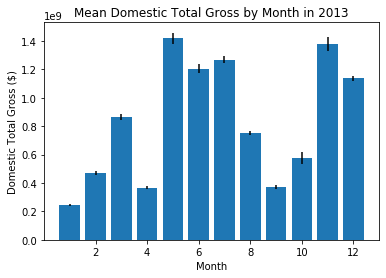

In [222]:
plt.bar(month_df.index,month_df['sum'],yerr=month_df['sem'])

plt.title('Mean Domestic Total Gross by Month in 2013',size=12)
plt.xlabel('Month')
plt.ylabel('Domestic Total Gross ($)');

Equation for standard error of the mean:
$\sigma_m = \frac{\sigma}{\sqrt(n)}$